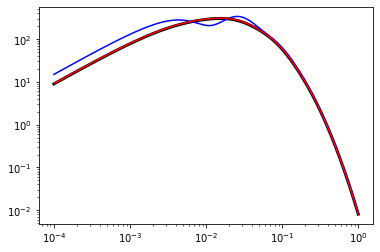

In [8]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *

np = 20 # accuracy of p integral
nq = 20 # accuracy of q integral
ne = 100 # number of energies
nv = 1000 # number of v_mins

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

nt = 30
days = linspace(0.0,365-365/(1.0*nt),nt)

# tabulate gmin
vmin = linspace(0.0,850.0,nv)

for i in range(0,nt):
    gmin_SHM[i,:] = gvmin_Isotropic(vmin,v_LSR=SHM.RotationSpeed,sig=SHM.Dispersion,v_esc=SHM.EscapeSpeed)
    gmin_Iso[i,:] = gvmin_Isotropic(vmin)
    gmin_Saus[i,:] = gvmin_Triaxial(vmin)
    

In [9]:
gmin0 = gvmin_Isotropic(vmin)
gmin_S1 = gvmin_Triaxial(vmin,v_shift=S1stream.Velocity,sig=S1stream.Dispersion,v_esc=1000.0)

In [10]:
R0 = ElectronRecoilRate(Xe131,E_r_vals,1000.0,sigma_e,HeavyMediator,vmin,gmin0,np=20,nq=20)
RS1 = ElectronRecoilRate(Xe131,E_r_vals,1000.0,sigma_e,HeavyMediator,vmin,gmin_S1,np=20,nq=20)

R1 = ElectronRecoilRate(Xe131,E_r_vals,1000.0,sigma_e,HeavyMediator,vmin,gmin0*(1-0.1)+0.1*gmin_S1,np=20,nq=20)
R2 = (1-0.1)*R0+0.1*RS1

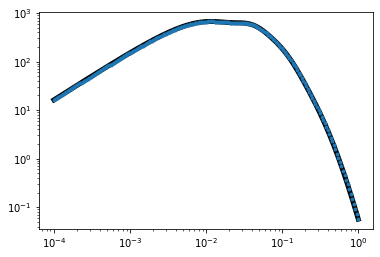

In [15]:
R1 = ElectronRecoilRate(Xe131,E_r_vals,1000.0,sigma_e,HeavyMediator,vmin,gmin0*(1-0.5)+0.5*gmin_S1,np=20,nq=20)
R2 = (1-0.5)*R0+0.5*RS1

plt.loglog(E_r_vals,R1,'k-',lw=5)
plt.loglog(E_r_vals,R2,'.')